In [1]:
import os
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import anndata
import numpy as np
import scanpy as sc
import seaborn as sns
import scvi
import pandas as pd
import leidenalg
import torch
from scipy.sparse import csr_matrix
torch.set_float32_matmul_precision('high')

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future relea

## 0.0 Import data

In [3]:
# data needs to be transposed
adata = sc.read_csv('../data/RAW/GSM5226574_C51ctr_raw_counts.csv').T

In [4]:
# to view cell barcodes
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [5]:
#to view counts
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# number of cells and genes
adata.X.shape

(6099, 34546)

these are counts

In [7]:
# to view genes
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


## 1.0 Preprocessing

### 1.1 Doublet removal
Each sample separately and then integrate them

In [8]:
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [9]:
# keep only cells that have 10 or more genes

sc.pp.filter_genes(adata, min_cells = 10)
adata

AnnData object with n_obs × n_vars = 6099 × 19896
    var: 'n_cells'

In [10]:
#keep only 2000 top variable genes

sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset = True, flavor = 'seurat_v3')
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [11]:
# set model with basic parameters so we can then predict doublets and train it

scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train(accelerator = 'gpu')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [04:00<00:00,  1.59it/s, v_num=1, train_loss_step=269, train_loss_epoch=323]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:00<00:00,  1.67it/s, v_num=1, train_loss_step=269, train_loss_epoch=323]


In [12]:
# this model predicts doublets from the trained vae model

solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train(accelerator = 'gpu')

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 216/400:  54%|█████▍    | 216/400 [02:06<01:47,  1.71it/s, v_num=1, train_loss_step=0.312, train_loss_epoch=0.3]  
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.284. Signaling Trainer to stop.


In [13]:
# save prediction that cell is a doublet in a new column

df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1_1,1.652295,-1.883419,doublet
ATTCACTGTAACAGGC-1_1,1.127958,-1.617884,doublet
TAACTTCCAACCACGC-1_1,0.378893,-0.392936,doublet
TTGGGTACACGACAAG-1_1,-0.215271,-0.557448,doublet
AGGCCACAGAGTCACG-1_1,0.503984,-0.827385,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1_1,-3.260007,3.361263,singlet
CACTGGGGTCTACGTA-1_1,-2.956576,2.716567,singlet
CATACTTGTAGAGGAA-1_1,-2.938916,2.982323,singlet
TTTGGTTTCCACGGAC-1_1,-3.515522,4.230628,singlet


not all doublet predictions are equal. first line has a difference of 4 between columns doublet and singlet, while third has a difference of only ~1. First prediction is stronger.

In [14]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1124,1124
singlet,4975,4975


Throwing 36% of data would be too much therefore I need to look at the strength of the predicitons

In [15]:
#create a new column with the differences between doublet and singlet prediction

df['dif'] = df['doublet'] - df['singlet']
df

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1_1,1.652295,-1.883419,doublet,3.535714
ATTCACTGTAACAGGC-1_1,1.127958,-1.617884,doublet,2.745843
TAACTTCCAACCACGC-1_1,0.378893,-0.392936,doublet,0.771829
TTGGGTACACGACAAG-1_1,-0.215271,-0.557448,doublet,0.342177
AGGCCACAGAGTCACG-1_1,0.503984,-0.827385,doublet,1.331369
...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,-3.260007,3.361263,singlet,-6.621271
CACTGGGGTCTACGTA-1_1,-2.956576,2.716567,singlet,-5.673143
CATACTTGTAGAGGAA-1_1,-2.938916,2.982323,singlet,-5.921238
TTTGGTTTCCACGGAC-1_1,-3.515522,4.230628,singlet,-7.746150


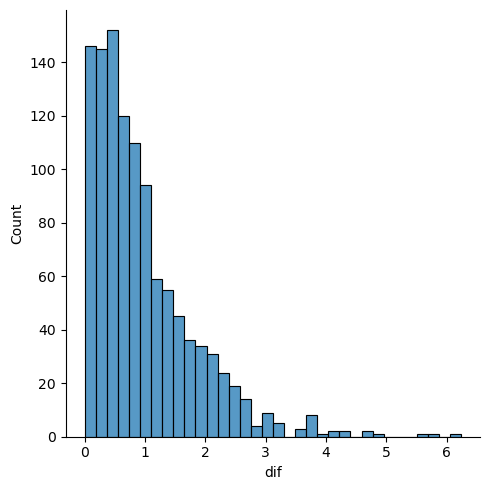

In [16]:
# look at the distribution of the differences

sns.displot(df[df.prediction == 'doublet'], x = 'dif');

In [22]:
# create a df with all the doublets that have prediction > 1

doublets = df[(df['prediction'] == 'doublet') & (df['dif'] > 1)]
doublets

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1_1,1.652295,-1.883419,doublet,3.535714
ATTCACTGTAACAGGC-1_1,1.127958,-1.617884,doublet,2.745843
AGGCCACAGAGTCACG-1_1,0.503984,-0.827385,doublet,1.331369
CACTGAAGTCGAAGCA-1_1,0.705523,-1.059231,doublet,1.764754
ACTGATGTCTGCACCT-1_1,1.090027,-1.393785,doublet,2.483812
...,...,...,...,...
CTTCAATCAGAACGCA-1_1,0.690425,-0.315081,doublet,1.005506
AGTTCGATCAGGGATG-1_1,0.560838,-0.642846,doublet,1.203683
CGCATGGAGTAAGAGG-1_1,0.874468,-0.572733,doublet,1.447201
TTGCTGCAGTGCGACA-1_1,0.612225,-0.838359,doublet,1.450584


In [24]:
# reload again adata file

adata = sc.read_csv('../data/RAW/GSM5226574_C51ctr_raw_counts.csv').T

In [25]:
# use doublet df as a mask adata

adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,True
ATTCACTGTAACAGGC-1_1,True
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,False
AGGCCACAGAGTCACG-1_1,True
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [26]:
# filter out those that are True (~ keeps False)

adata = adata[~adata.obs.doublet]
adata

View of AnnData object with n_obs × n_vars = 5692 × 34546
    obs: 'doublet'

Doublets have been removed

### 1.2 Remove mitochondrial and ribosomal genes

Mitochondrial genes are annotated MT- (human) or Mt- Mmt- for other orgs (there are only 13)

In [27]:
#find all mt genes
adata.var[adata.var.index.str.startswith('MT-')]

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [28]:
# add column flagging mt genes
adata.var['mt'] = adata.var.index.str.startswith('MT-')
adata.var

/tmp/ipykernel_64157/1257314383.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


Removing ribosomal genes using broad institue list of ribosomal genes

In [29]:
# import list of ribosomal genes

ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [30]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [35]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [34]:
adata.obs

,doublet
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,False
TTACCGCCACTCAGAT-1_1,False
TTGGTTTTCCTAGCTC-1_1,False
TGGGAAGTCAGTGATC-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


Now I can run qc metrics on the genes and cells to filter out undesired ones

In [36]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [37]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,7,0.001230,99.877020,7.0
AL627309.5,False,False,28,0.004919,99.508082,28.0
AL627309.4,False,False,3,0.000527,99.947294,3.0
AL669831.2,False,False,2,0.000351,99.964863,2.0
LINC01409,False,False,233,0.044273,95.906535,252.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [38]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319
TGGGAAGTCAGTGATC-1_1,False,4719,11238.0,92.0,0.818651,11.0,0.097882
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [39]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC108865.2,False,False,0,0.000000,100.000000,0.0
AC108046.1,False,False,0,0.000000,100.000000,0.0
LINC02515,False,False,0,0.000000,100.000000,0.0
AC122138.1,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4096,2.843465,28.039353,16185.0
NEAT1,False,False,4180,5.021082,26.563598,28580.0
MBNL1,False,False,4185,2.687808,26.475755,15299.0
ZBTB20,False,False,4331,2.436402,23.910752,13868.0


In [40]:
# filter genes that are in less than 3 cells

sc.pp.filter_genes(adata, min_cells = 3)

In [41]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
STX1B,False,False,3,0.000527,99.947294,3.0,3
LINC01187,False,False,3,0.000527,99.947294,3.0,3
AL353708.3,False,False,3,0.000527,99.947294,3.0,3
AC011365.2,False,False,3,0.000527,99.947294,3.0,3
CCL4L2,False,False,3,0.000703,99.947294,4.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4096,2.843465,28.039353,16185.0,4096
NEAT1,False,False,4180,5.021082,26.563598,28580.0,4180
MBNL1,False,False,4185,2.687808,26.475755,15299.0,4185
ZBTB20,False,False,4331,2.436402,23.910752,13868.0,4331


In [42]:
adata.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CAGGGCTTCATGCGGC-1_1,False,330,401.0,7.0,1.745636,1.0,0.249377
TGGTACAGTTGGTGTT-1_1,False,323,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,False,325,401.0,0.0,0.000000,0.0,0.000000
AGGCATTCATCCGTTC-1_1,False,290,401.0,1.0,0.249377,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,False,308,401.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
TGGGAAGTCAGTGATC-1_1,False,4719,11238.0,92.0,0.818651,11.0,0.097882
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319
TTGGGTACACGACAAG-1_1,False,4900,15220.0,3.0,0.019711,5.0,0.032852


seems that authors have already filterd out cells with 400 or less genes  
otherwise:

In [43]:
#sc.pp.filter_cells(adata, min_genes = 200)

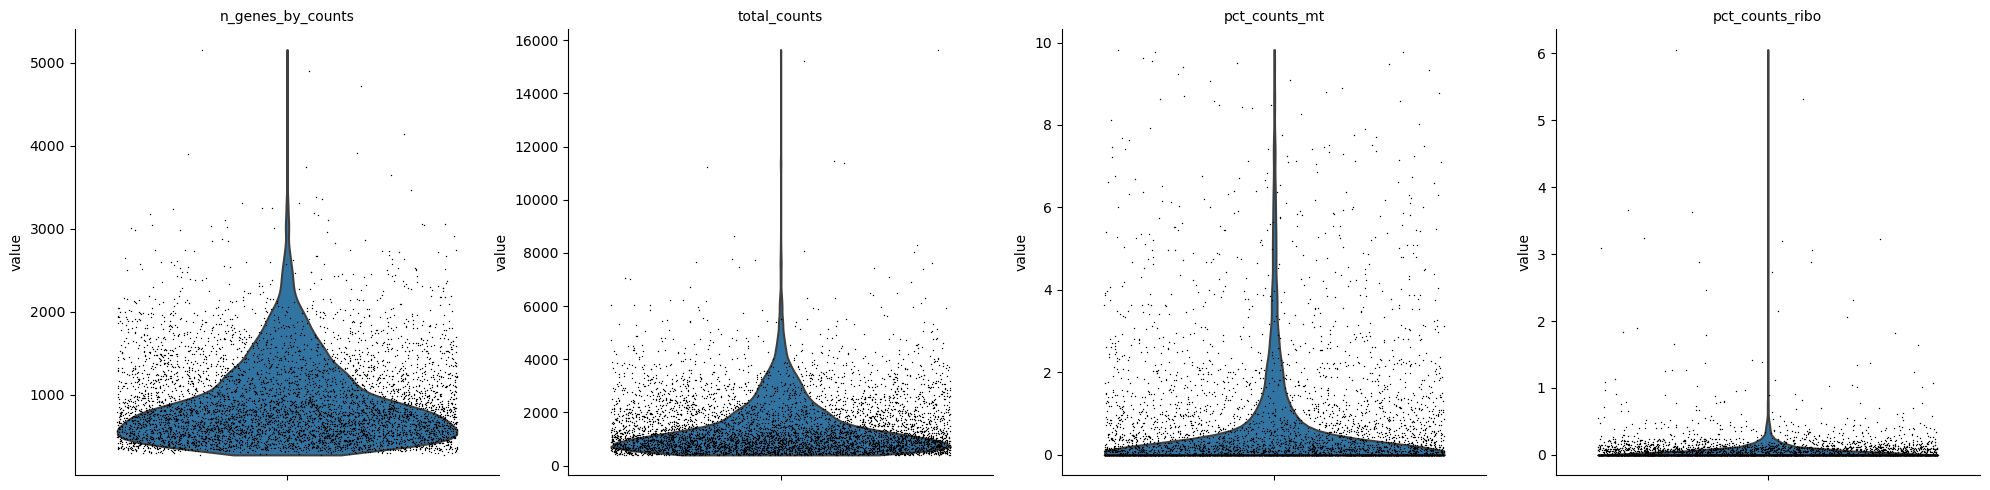

In [44]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter = 0.4, multi_panel = True)


1. If there is a cell with much higher number of genes than average = artifact. The same goes for counts but they are highly corelated so filtering one is usually enough  
2. If high mt than sequencing artifact or cell dying (filter 5-20%)  
3. Most ribosomal genes counts are at zero but there are a few  

In [45]:
# pick value of 98 percentile as upper limit

upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
upper_lim

2310.1800000000003

In [46]:
# filter out cells that are above upper_lim

adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [47]:
# removing cells with more than 20 mt gene counts (nothing in this case)

adata = adata[adata.obs.pct_counts_mt < 20]

In [48]:
# removing cells with more than 2 ribosomal gene counts

adata = adata[adata.obs.pct_counts_ribo < 2]

In [50]:
adata

View of AnnData object with n_obs × n_vars = 5562 × 24180
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

## 2.0 Normalization

In [51]:
# gene counts in each cell

adata.X.sum(axis = 1)

ArrayView([5433., 5503., 5250., ...,  410.,  405.,  410.], dtype=float32)

counts in each cell are different thus we need to normalise per cell

In [52]:
# scale each cell to 10 000 UMI

sc.pp.normalize_total(adata, target_sum=1e4)

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [53]:
adata.X.sum(axis = 1)

array([10000.   , 10000.   , 10000.001, ..., 10000.   , 10000.   ,
       10000.   ], dtype=float32)

In [54]:
# convert to log counts

sc.pp.log1p(adata)

In [55]:
adata.X.sum(axis = 1)

array([3285.3794, 3164.6206, 2858.1604, ..., 1191.2706, 1022.7511,
       1162.8785], dtype=float32)

they are more comparable now

In [56]:
# freeze the data as it is now before filterning based on variable genes etc
# save into raw slot of adata

adata.raw = adata

## 3.0 Clustering

In [57]:
# find 2000 most variable genes

sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

In [58]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,7,0.001230,99.877020,7.0,7,True,0.010993,2.764102,1.258722
AL627309.5,False,False,28,0.004919,99.508082,28.0,28,False,0.029396,2.289506,-0.174489
AL627309.4,False,False,3,0.000527,99.947294,3.0,3,False,0.002497,1.702828,-1.946174
LINC01409,False,False,233,0.044273,95.906535,252.0,233,False,0.264301,2.330705,-0.050076
FAM87B,False,False,6,0.001054,99.894589,6.0,6,False,0.007160,1.947631,-1.206906
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,120,0.021961,97.891778,125.0,120,False,0.154230,2.417230,0.211219
AL592183.1,False,False,869,0.180077,84.732959,1025.0,869,False,0.864680,2.508910,-0.389773
AC240274.1,False,False,144,0.026001,97.470134,148.0,144,False,0.151600,2.301288,-0.138911
AC007325.4,False,False,4,0.000703,99.929726,4.0,4,False,0.003001,1.579804,-2.317691


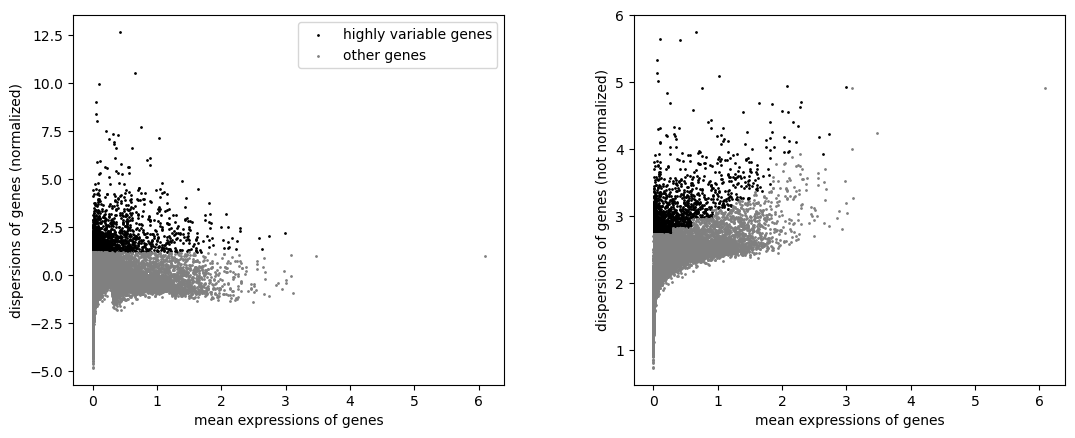

In [59]:
sc.pl.highly_variable_genes(adata)

In [60]:
# filtern not highly variable genes

adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 5562 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [61]:
# regress out the differences that arise due to total counts, mt counts and ribo counts
# removes some variations in the data caused by processing, sample quality and seq artifacts etc

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [62]:
# normalise each gene to the unite variance of that gene

sc.pp.scale(adata, max_value=10)

In [63]:
# PCA to reduce dimension of the data into ~ 30 dimensions
 
sc.tl.pca(adata, svd_solver = 'arpack')

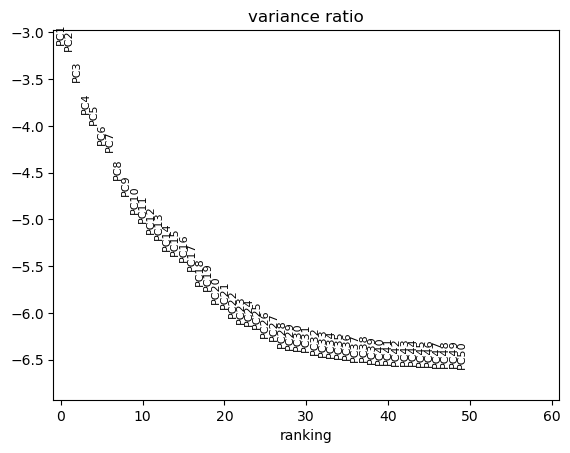

In [64]:
# elbov around 30

sc.pl.pca_variance_ratio(adata, log = True, n_pcs = 60)

In [65]:
# calculate neighbors of the cells using top 30 components

sc.pp.neighbors(adata, n_pcs = 30)

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/

In [66]:
# this shows cell by cell matrix
# every cell that is connected has a value

adata.obsp['connectivities'].toarray()

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.4169295, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.4169295, 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [67]:
# this shows cell by cell matrix
# every cell that is connected gets a distance

adata.obsp['distances'].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 5.74357319, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.74357319, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


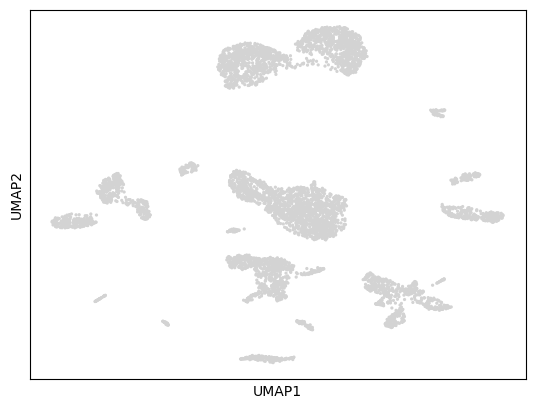

In [68]:
# reduce to 2 dimensions using UMAP
# plot the UMAP

sc.tl.umap(adata)
sc.pl.umap(adata)

In [69]:
# assign clustering using leden algorithm
# closer to 1 = more clusters
# closer to 0 = less clusters

sc.tl.leiden(adata, resolution = 0.5)

In [70]:
# new column with leiden label

adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CCTCAACCATACAGGG-1_1,False,2276,5434.0,38.0,0.699301,0.0,0.000000,12
ACAAAGATCCACAGGC-1_1,False,2310,5504.0,1.0,0.018169,1.0,0.018169,2
ATACTTCCAAGGTCTT-1_1,False,2122,5252.0,1.0,0.019040,4.0,0.076161,2
TCAATCTTCGCCAATA-1_1,False,2307,5062.0,0.0,0.000000,0.0,0.000000,2
GGGTCACTCTATTCGT-1_1,False,2286,5056.0,0.0,0.000000,1.0,0.019778,2
...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827,11


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


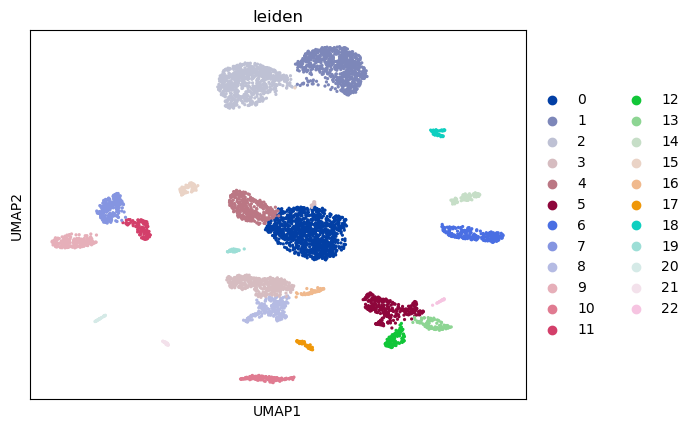

In [71]:
# plot umap with the clusters

sc.pl.umap(adata, color=['leiden'])

## 4.0 Integration and Clustering all the samples

### 4.1 Integration

1. Integrate all samples into one adata object
2. adjust batch differences

Integration code was adjusted to save RAM

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import anndata
import numpy as np
import scanpy as sc
import seaborn as sns
import scvi
import pandas as pd
import leidenalg
import torch
import anndata
from scipy.sparse import csr_matrix
torch.set_float32_matmul_precision('high')

ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)

def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train(accelerator = 'gpu')
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train(accelerator = 'gpu')
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[1] #'../RAW/GSM5226574_C51ctr_raw_counts.csv'
    
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]
    
    
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]
    # because of thelac of memory I needed to convert into sparse matrix
    # however that did not work without fileter_gene() first
    # but I did not want to filter each sample individually
    # thus I used filter gene with min_cells = 0, converted into sparse matrix and then filtered after I concatanated all the samples
    sc.pp.filter_genes(adata, min_cells = 0)
    adata.X = csr_matrix(adata.X)

    return adata

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future relea

In [2]:
out = []
counter = 0

for file in os.listdir('../data/RAW/'):
    counter += 1
    print( '\n')
    print(f'Processinf file number: {counter}')
    out.append(pp('../data/RAW/' + file))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:11<00:00,  3.38it/s, v_num=1, train_loss_step=335, train_loss_epoch=337]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:11<00:00,  3.03it/s, v_num=1, train_loss_step=335, train_loss_epoch=337]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 275/400:  69%|██████▉   | 275/400 [01:22<00:37,  3.35it/s, v_num=1, train_loss_step=0.673, train_loss_epoch=0.25]  
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.209. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:49<00:00,  2.46it/s, v_num=1, train_loss_step=394, train_loss_epoch=324]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:49<00:00,  2.36it/s, v_num=1, train_loss_step=394, train_loss_epoch=324]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 155/400:  39%|███▉      | 155/400 [00:58<01:32,  2.65it/s, v_num=1, train_loss_step=0.448, train_loss_epoch=0.287]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.323. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:42<00:00,  2.61it/s, v_num=1, train_loss_step=330, train_loss_epoch=341]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:42<00:00,  2.46it/s, v_num=1, train_loss_step=330, train_loss_epoch=341]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 196/400:  49%|████▉     | 196/400 [01:15<01:18,  2.59it/s, v_num=1, train_loss_step=0.0955, train_loss_epoch=0.267]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.267. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [04:04<00:00,  1.66it/s, v_num=1, train_loss_step=360, train_loss_epoch=331]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:04<00:00,  1.63it/s, v_num=1, train_loss_step=360, train_loss_epoch=331]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 216/400:  54%|█████▍    | 216/400 [02:00<01:42,  1.80it/s, v_num=1, train_loss_step=0.219, train_loss_epoch=0.307]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.313. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:48<00:00,  2.55it/s, v_num=1, train_loss_step=472, train_loss_epoch=472]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:48<00:00,  2.37it/s, v_num=1, train_loss_step=472, train_loss_epoch=472]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 154/400:  38%|███▊      | 154/400 [01:04<01:43,  2.38it/s, v_num=1, train_loss_step=0.325, train_loss_epoch=0.345]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.366. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:24<00:00,  2.85it/s, v_num=1, train_loss_step=323, train_loss_epoch=307]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:24<00:00,  2.77it/s, v_num=1, train_loss_step=323, train_loss_epoch=307]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 171/400:  43%|████▎     | 171/400 [01:05<01:27,  2.63it/s, v_num=1, train_loss_step=0.335, train_loss_epoch=0.244]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.224. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [00:56<00:00,  7.19it/s, v_num=1, train_loss_step=320, train_loss_epoch=312]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [00:56<00:00,  7.14it/s, v_num=1, train_loss_step=320, train_loss_epoch=312]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 236/400:  59%|█████▉    | 236/400 [00:30<00:21,  7.70it/s, v_num=1, train_loss_step=0.333, train_loss_epoch=0.271]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.321. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:54<00:00,  3.55it/s, v_num=1, train_loss_step=393, train_loss_epoch=331]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:54<00:00,  3.51it/s, v_num=1, train_loss_step=393, train_loss_epoch=331]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 189/400:  47%|████▋     | 189/400 [00:48<00:54,  3.90it/s, v_num=1, train_loss_step=0.288, train_loss_epoch=0.287]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.267. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:08<00:00,  2.81it/s, v_num=1, train_loss_step=292, train_loss_epoch=259]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:08<00:00,  3.11it/s, v_num=1, train_loss_step=292, train_loss_epoch=259]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 229/400:  57%|█████▋    | 229/400 [01:13<00:54,  3.11it/s, v_num=1, train_loss_step=0.403, train_loss_epoch=0.278]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.253. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:45<00:00,  3.01it/s, v_num=1, train_loss_step=349, train_loss_epoch=345]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:45<00:00,  3.81it/s, v_num=1, train_loss_step=349, train_loss_epoch=345]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 260/400:  65%|██████▌   | 260/400 [01:13<00:39,  3.55it/s, v_num=1, train_loss_step=0.493, train_loss_epoch=0.322]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.322. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:16<00:00,  2.27it/s, v_num=1, train_loss_step=340, train_loss_epoch=326]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:16<00:00,  2.93it/s, v_num=1, train_loss_step=340, train_loss_epoch=326]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 355/400:  89%|████████▉ | 355/400 [02:04<00:15,  2.85it/s, v_num=1, train_loss_step=0.372, train_loss_epoch=0.253] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.256. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:53<00:00,  2.57it/s, v_num=1, train_loss_step=282, train_loss_epoch=288]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:53<00:00,  2.31it/s, v_num=1, train_loss_step=282, train_loss_epoch=288]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 212/400:  53%|█████▎    | 212/400 [01:19<01:10,  2.66it/s, v_num=1, train_loss_step=0.553, train_loss_epoch=0.242]  
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.233. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [04:24<00:00,  1.31it/s, v_num=1, train_loss_step=304, train_loss_epoch=361]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:24<00:00,  1.52it/s, v_num=1, train_loss_step=304, train_loss_epoch=361]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 118/400:  30%|██▉       | 118/400 [01:12<02:54,  1.62it/s, v_num=1, train_loss_step=0.317, train_loss_epoch=0.299]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.293. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:59<00:00,  2.57it/s, v_num=1, train_loss_step=417, train_loss_epoch=372]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:59<00:00,  2.23it/s, v_num=1, train_loss_step=417, train_loss_epoch=372]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 223/400:  56%|█████▌    | 223/400 [01:23<01:05,  2.68it/s, v_num=1, train_loss_step=0.41, train_loss_epoch=0.3]   
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.293. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:29<00:00,  1.60it/s, v_num=1, train_loss_step=305, train_loss_epoch=323]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:29<00:00,  1.91it/s, v_num=1, train_loss_step=305, train_loss_epoch=323]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 110/400:  28%|██▊       | 110/400 [00:58<02:33,  1.89it/s, v_num=1, train_loss_step=0.308, train_loss_epoch=0.313]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.296. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:03<00:00,  6.44it/s, v_num=1, train_loss_step=389, train_loss_epoch=380]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:03<00:00,  6.30it/s, v_num=1, train_loss_step=389, train_loss_epoch=380]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 240/400:  60%|██████    | 240/400 [00:38<00:25,  6.31it/s, v_num=1, train_loss_step=0.41, train_loss_epoch=0.297] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.321. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:54<00:00,  2.38it/s, v_num=1, train_loss_step=341, train_loss_epoch=341]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:54<00:00,  2.30it/s, v_num=1, train_loss_step=341, train_loss_epoch=341]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 292/400:  73%|███████▎  | 292/400 [02:09<00:47,  2.26it/s, v_num=1, train_loss_step=1.38, train_loss_epoch=0.354]  
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.344. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:37<00:00,  4.10it/s, v_num=1, train_loss_step=325, train_loss_epoch=304]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:37<00:00,  4.09it/s, v_num=1, train_loss_step=325, train_loss_epoch=304]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 211/400:  53%|█████▎    | 211/400 [00:55<00:49,  3.84it/s, v_num=1, train_loss_step=0.163, train_loss_epoch=0.19] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.213. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:56<00:00,  3.44it/s, v_num=1, train_loss_step=598, train_loss_epoch=319]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:57<00:00,  3.42it/s, v_num=1, train_loss_step=598, train_loss_epoch=319]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 203/400:  51%|█████     | 203/400 [00:58<00:56,  3.48it/s, v_num=1, train_loss_step=0.34, train_loss_epoch=0.299] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.275. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:17<00:00,  2.97it/s, v_num=1, train_loss_step=310, train_loss_epoch=320]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:17<00:00,  2.92it/s, v_num=1, train_loss_step=310, train_loss_epoch=320]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 339/400:  85%|████████▍ | 339/400 [01:56<00:20,  2.92it/s, v_num=1, train_loss_step=0.335, train_loss_epoch=0.314]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.319. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:50<00:00,  3.75it/s, v_num=1, train_loss_step=338, train_loss_epoch=364]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:50<00:00,  3.63it/s, v_num=1, train_loss_step=338, train_loss_epoch=364]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 209/400:  52%|█████▏    | 209/400 [01:00<00:55,  3.44it/s, v_num=1, train_loss_step=0.28, train_loss_epoch=0.349] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.324. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:21<00:00,  2.81it/s, v_num=1, train_loss_step=318, train_loss_epoch=340]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:21<00:00,  2.83it/s, v_num=1, train_loss_step=318, train_loss_epoch=340]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 255/400:  64%|██████▍   | 255/400 [01:32<00:52,  2.76it/s, v_num=1, train_loss_step=0.27, train_loss_epoch=0.302] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.289. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:36<00:00,  2.29it/s, v_num=1, train_loss_step=381, train_loss_epoch=399]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:36<00:00,  2.56it/s, v_num=1, train_loss_step=381, train_loss_epoch=399]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 170/400:  42%|████▎     | 170/400 [01:06<01:30,  2.55it/s, v_num=1, train_loss_step=0.338, train_loss_epoch=0.304]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.319. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [02:28<00:00,  2.75it/s, v_num=1, train_loss_step=355, train_loss_epoch=353]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:28<00:00,  2.70it/s, v_num=1, train_loss_step=355, train_loss_epoch=353]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 261/400:  65%|██████▌   | 261/400 [01:29<00:47,  2.93it/s, v_num=1, train_loss_step=0.276, train_loss_epoch=0.286]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.280. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  3.93it/s, v_num=1, train_loss_step=410, train_loss_epoch=414]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:34<00:00,  4.23it/s, v_num=1, train_loss_step=410, train_loss_epoch=414]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 218/400:  55%|█████▍    | 218/400 [00:48<00:40,  4.48it/s, v_num=1, train_loss_step=0.316, train_loss_epoch=0.333]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.374. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:26<00:00,  2.14it/s, v_num=1, train_loss_step=327, train_loss_epoch=305]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:26<00:00,  1.93it/s, v_num=1, train_loss_step=327, train_loss_epoch=305]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 147/400:  37%|███▋      | 147/400 [01:08<01:58,  2.14it/s, v_num=1, train_loss_step=0.335, train_loss_epoch=0.235] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.242. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [04:05<00:00,  1.40it/s, v_num=1, train_loss_step=438, train_loss_epoch=340]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [04:05<00:00,  1.63it/s, v_num=1, train_loss_step=438, train_loss_epoch=340]
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 191/400:  48%|████▊     | 191/400 [01:59<02:11,  1.59it/s, v_num=1, train_loss_step=0.264, train_loss_epoch=0.317]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.301. Signaling Trainer to stop.


/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [3]:
out

[AnnData object with n_obs × n_vars = 3368 × 34546
     obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
     var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells',
 AnnData object with n_obs × n_vars = 4386 × 34546
     obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
     var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells',
 AnnData object with n_obs × n_vars = 4341 × 34546
     obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
     var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells',
 AnnData object with n_obs × n_vars = 6928 × 3454

In [4]:
adata = sc.concat(out)
adata

AnnData object with n_obs × n_vars = 108822 × 34546
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'

In [5]:
sc.pp.filter_genes(adata, min_cells = 10)
adata

AnnData object with n_obs × n_vars = 108822 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [7]:
adata.write_h5ad('../data/processed/combined.h5ad')
del out

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import scanpy as sc
import seaborn as sns
import scvi
import pandas as pd
import leidenalg
import torch
from scipy.sparse import csr_matrix
torch.set_float32_matmul_precision('high')

adata = sc. read_h5ad('../data/processed/combined.h5ad')
adata

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future relea

AnnData object with n_obs × n_vars = 108822 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

there are 108822 cells and 29581 genes

In [2]:
# how many cells per sample?

adata.obs.groupby('Sample').count()

,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,,
C51ctr,5960,5960,5960,5960,5960,5960,5960,5960
C52ctr,4415,4415,4415,4415,4415,4415,4415,4415
C53ctr,6928,6928,6928,6928,6928,6928,6928,6928
C54ctr,4284,4284,4284,4284,4284,4284,4284,4284
C55ctr,5565,5565,5565,5565,5565,5565,5565,5565
C56ctr,3904,3904,3904,3904,3904,3904,3904,3904
C57ctr,4687,4687,4687,4687,4687,4687,4687,4687
L01cov,2952,2952,2952,2952,2952,2952,2952,2952
L03cov,3953,3953,3953,3953,3953,3953,3953,3953


correcting for batch effects, mt and rb counts

In [3]:
# saving raw data into counts layer

adata.layers['counts'] = adata.X.copy()

In [4]:
# normalizing to 10k in every cell, log transformimng, saving into raw layer

sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [5]:
adata.obs.head()

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CATTCCGGTCGCACAC-1_16,L09cov,False,2244,2244,4135.0,0.0,0.0,22.0,0.532044
TGAATGCGTGTGAGCA-1_16,L09cov,False,2281,2281,4143.0,0.0,0.0,24.0,0.579290
GAAGGGTAGGATACGC-1_16,L09cov,False,2307,2307,4100.0,0.0,0.0,18.0,0.439024
TACCGAATCTGTCAGA-1_16,L09cov,False,2265,2265,3945.0,0.0,0.0,21.0,0.532319
TGCGATACAAGTGGAC-1_16,L09cov,False,2214,2214,3811.0,0.0,0.0,56.0,1.469431


In [6]:
# since there are many more cells than genes I dont ahve to filter out genes for scvi (if more than half = filter)
# sc.pp.highly_variable_genes(adata, n_top_genes = 3000, subset = True, layer = 'counts',
#                            flavor = 'seurat_v3', batch_key="Sample")

In [7]:
# set up scvi model
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [8]:
model = scvi.model.SCVI(adata)

In [9]:
model.train(accelerator='gpu')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 74/74: 100%|██████████| 74/74 [29:47<00:00, 23.66s/it, v_num=1, train_loss_step=2.79e+3, train_loss_epoch=2.97e+3]

`Trainer.fit` stopped: `max_epochs=74` reached.


Epoch 74/74: 100%|██████████| 74/74 [29:47<00:00, 24.16s/it, v_num=1, train_loss_step=2.79e+3, train_loss_epoch=2.97e+3]


In [10]:
# save scvi array that represent the data

adata.obsm['X_scVI'] = model.get_latent_representation()
adata.obsm['X_scVI']

array([[-2.3168256 ,  6.812282  ,  4.461941  , ...,  1.3122568 ,
        -2.3201656 , -0.15010667],
       [-0.47267666, -0.6923008 ,  2.912938  , ...,  1.4034386 ,
         1.2863312 ,  4.442772  ],
       [-3.4850068 ,  5.437814  ,  3.9130883 , ...,  0.30074096,
        -1.9072899 , -2.0054274 ],
       ...,
       [ 0.38582614,  0.01219463,  0.20451748, ..., -0.0085195 ,
         0.26126087, -2.6441524 ],
       [ 0.51072913, -0.6203551 ,  1.6318892 , ...,  1.2750376 ,
        -0.05178505, -2.2060747 ],
       [ 0.5216762 ,  0.712543  , -1.4140626 , ..., -0.62015593,
         1.3772649 , -1.1545552 ]], dtype=float32)

In [11]:
# saving normalized expression

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size=1e4)
adata.layers['scvi_normalized']

array([[0.00229086, 0.02741837, 0.00520174, ..., 0.0069332 , 0.00076333,
        0.00141714],
       [0.00835099, 0.017988  , 0.00049359, ..., 0.00280598, 0.00075986,
        0.00680704],
       [0.00589565, 0.03777755, 0.00861852, ..., 0.00903699, 0.002424  ,
        0.00182295],
       ...,
       [0.04139019, 0.05275999, 0.00828513, ..., 0.00988548, 0.01074309,
        0.00541307],
       [0.01240049, 0.09350815, 0.00210253, ..., 0.00173523, 0.0023513 ,
        0.00189847],
       [0.03433709, 0.04364195, 0.00313018, ..., 0.00264745, 0.00014851,
        0.00093365]], dtype=float32)

### 4.2 Clustering

In [12]:
sc.pp.neighbors(adata, use_rep='X_scVI')

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/

In [13]:
# generate umap 

sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 1.5)

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


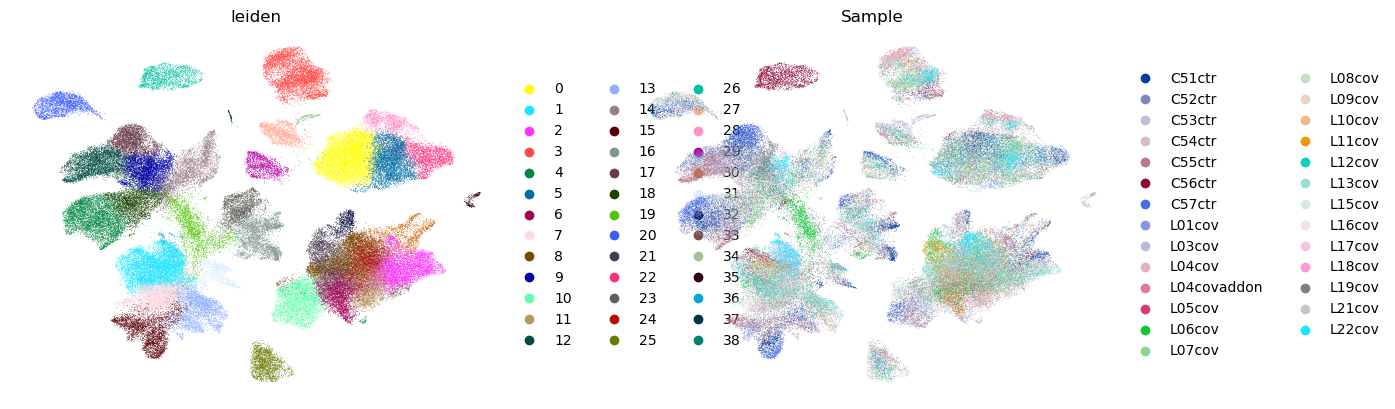

In [14]:
# plotting 2 umaps
# first with the clusters labeled
# second with the samples labeled

sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

Most of the clusters seems to containg cells from all the samples except for one cluster which contain only cells from sample C56ctr

In [15]:
adata.write_h5ad('../data/processed/integrated.h5ad')

In [16]:
model.save("../data/processed/integrated_model", save_anndata=True, overwrite=True)

## 5.0 Finding markers and labeling cell types

### 5.1 Get markers based on RAW data

In [ ]:
'''
adata = sc.read_h5ad('../data/processed/integrated_model/adata.h5ad')
model = scvi.model.SCVI.load('../data/processed/integrated_model/', accelerator = 'gpu')

# there is an error when writinh/reading h5ad files where it does not save None values
# some functions below require 'log1p' to contain None therefore:
adata.uns['log1p']["base"] = None

print(adata)
print(model)
'''

In [18]:
# this updates layer in adata
sc.tl.rank_genes_groups(adata, 'leiden')

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: P

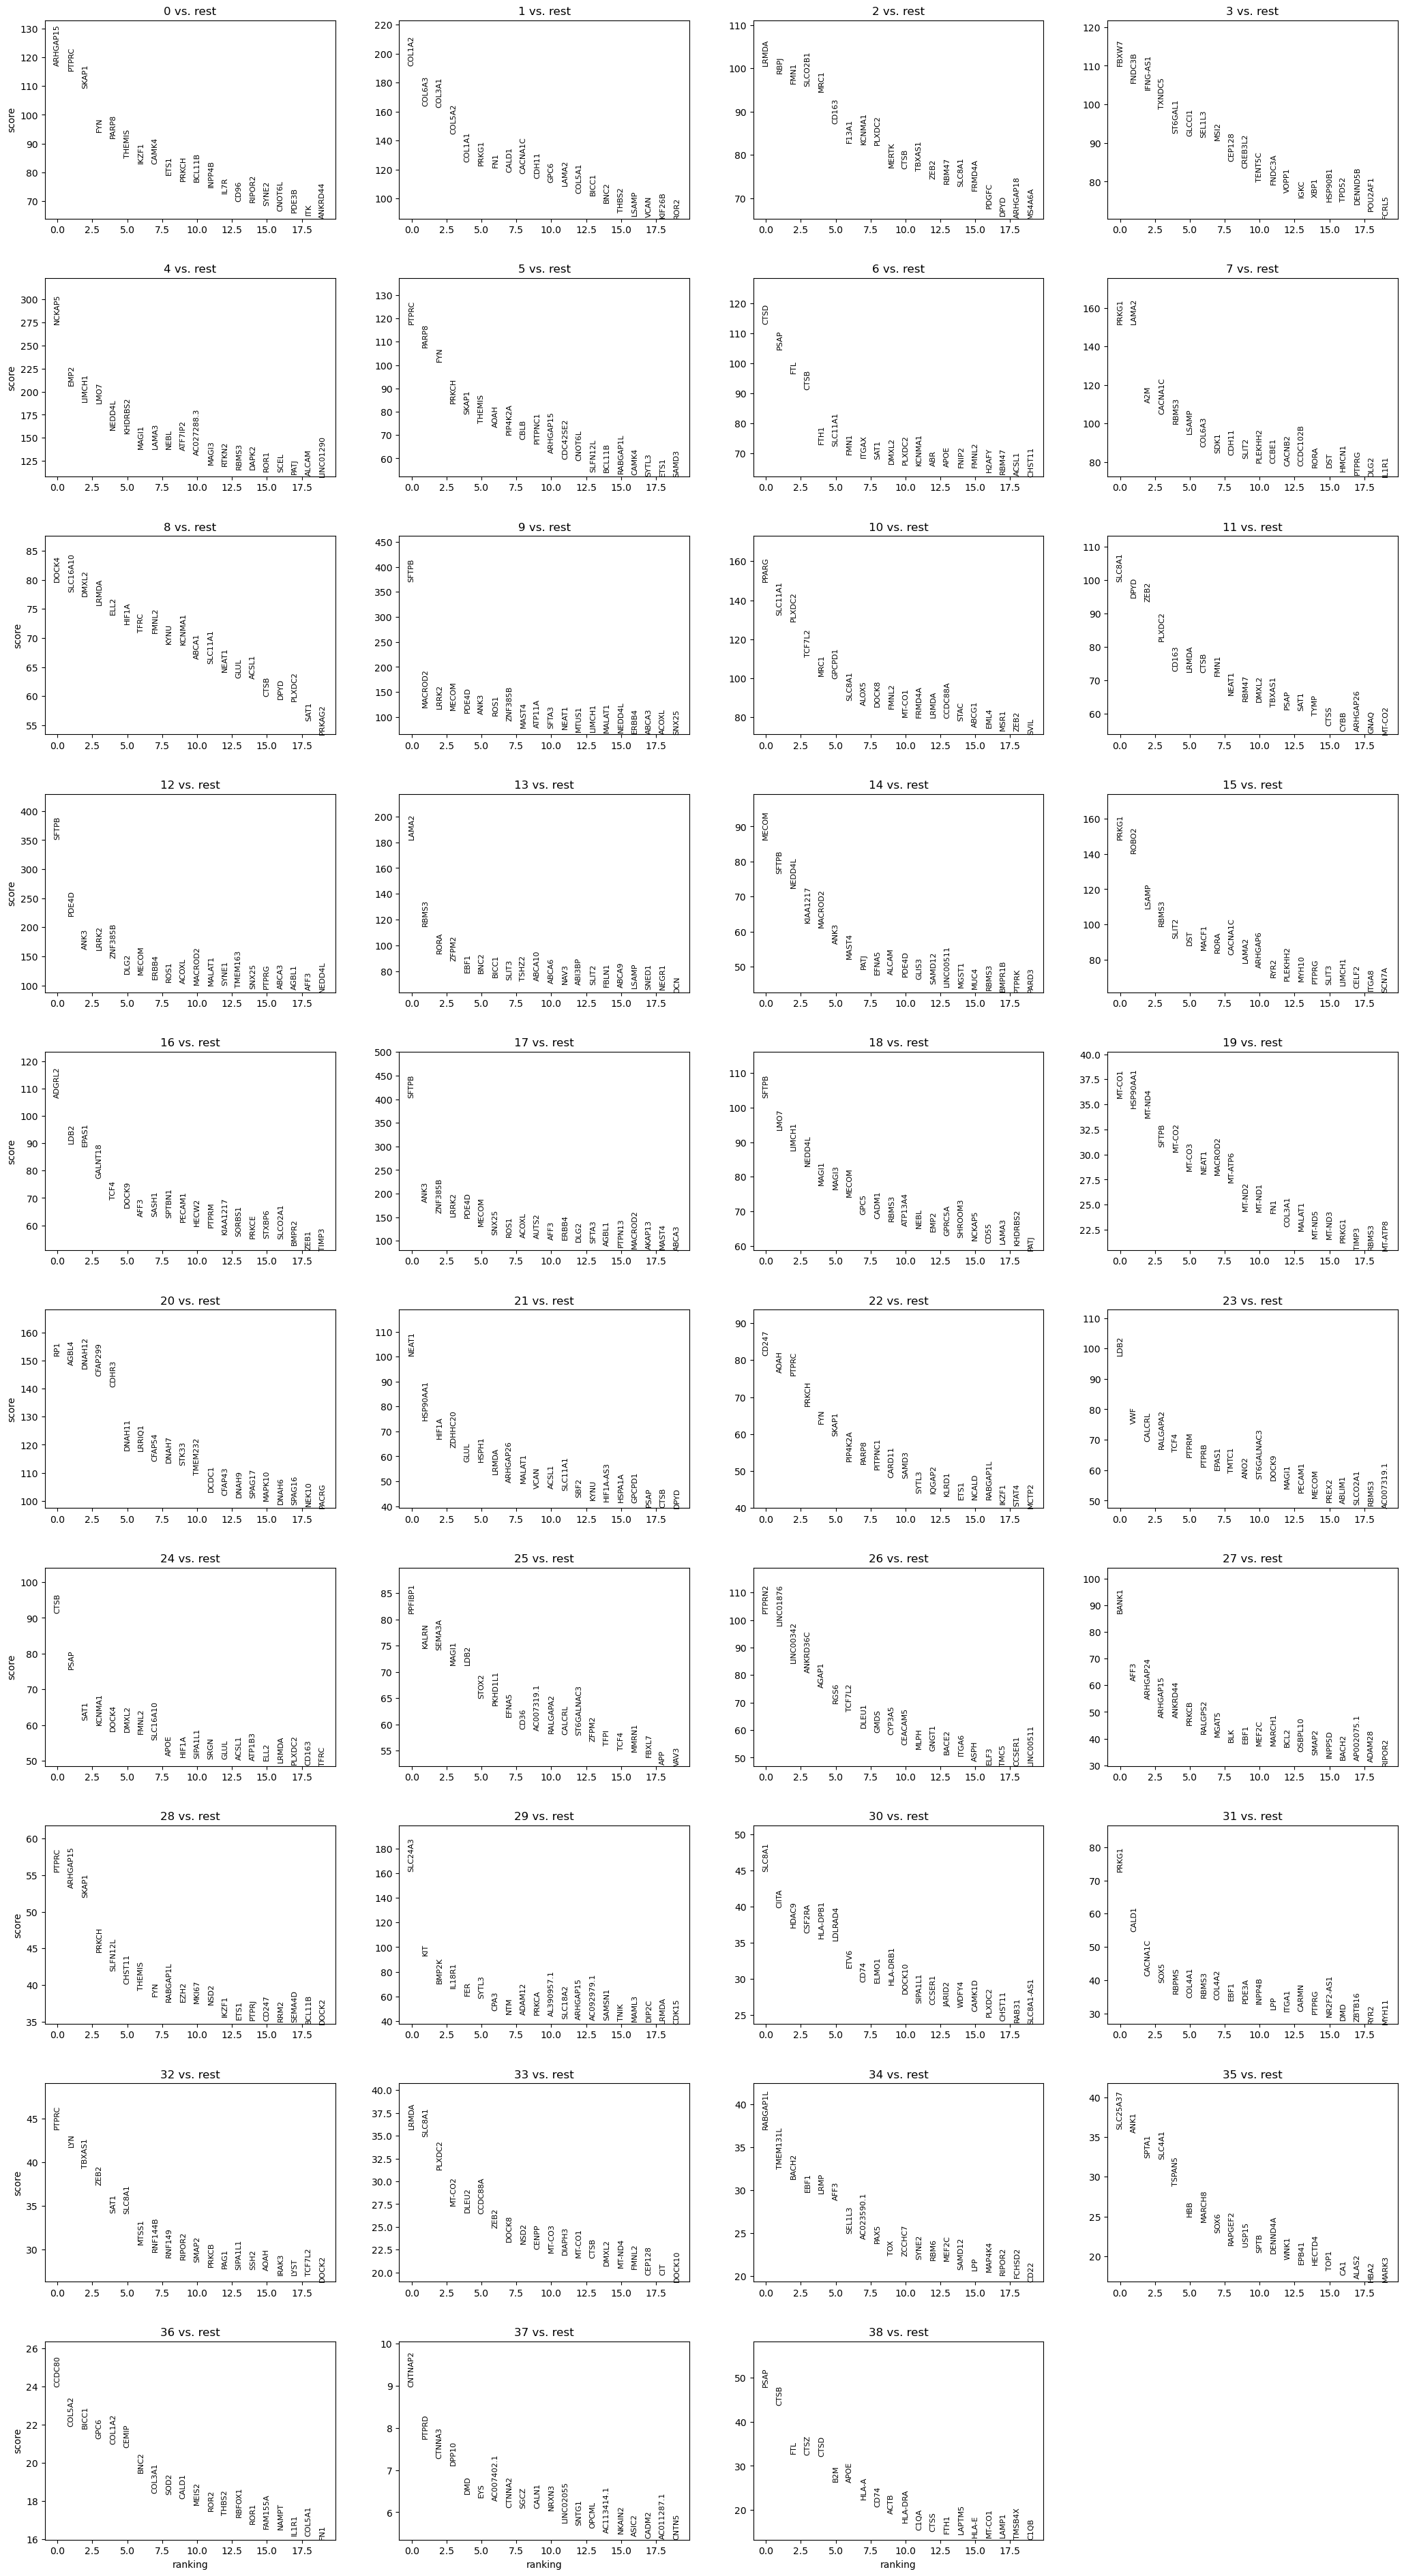

In [19]:
# plot top 20 genes for each cluster

sc.pl.rank_genes_groups(adata, n_genes = 20, sharey = False)

In [20]:
# same info as a dataframe where group is leiden cluster 
# saved as markers

markers = sc.get.rank_genes_groups_df(adata, None)
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,ARHGAP15,117.001228,3.882198,0.0,0.0
1,0,PTPRC,115.519005,3.668379,0.0,0.0
2,0,SKAP1,109.213654,5.008254,0.0,0.0
3,0,FYN,94.147514,3.743654,0.0,0.0
4,0,PARP8,91.946869,3.558742,0.0,0.0
...,...,...,...,...,...,...
1153654,38,SPIDR,-328.219971,-31.500914,0.0,0.0
1153655,38,ARID1B,-341.099976,-31.538307,0.0,0.0
1153656,38,ZFAND3,-381.037262,-31.909702,0.0,0.0
1153657,38,ZBTB20,-395.486786,-32.212002,0.0,0.0


In [21]:
# filter everything with high p values and low log fold change

markers = markers[(markers['pvals_adj'] < 0.05) & (markers['logfoldchanges'] > 0.5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,ARHGAP15,117.001228,3.882198,0.000000,0.000000
1,0,PTPRC,115.519005,3.668379,0.000000,0.000000
2,0,SKAP1,109.213654,5.008254,0.000000,0.000000
3,0,FYN,94.147514,3.743654,0.000000,0.000000
4,0,PARP8,91.946869,3.558742,0.000000,0.000000
...,...,...,...,...,...,...
1124854,38,BZW1,2.092973,2.216912,0.041550,0.049547
1124855,38,MCEMP1,2.091372,3.559659,0.041701,0.049724
1124856,38,VKORC1,2.090855,3.590893,0.041749,0.049780
1124857,38,TMED3,2.089490,2.198281,0.041877,0.049929


### 5.2 Get markers based on scvi model

In [22]:
# use scvi model to group by leiden

markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 39/39 [28:32<00:00, 43.91s/it]  


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
KIF5C,0.9972,0.0028,5.875328,0.000084,5.865969e-06,0.0,0.25,4.636516,4.657314,1.968611,...,0.070244,0.004061,0.061534,0.003697,0.955727,0.039268,True,0 vs Rest,0,Rest
AL121935.1,0.9960,0.0040,5.517450,0.000034,1.197700e-06,0.0,0.25,5.931989,6.078439,2.378537,...,0.023602,0.000688,0.022478,0.000678,0.331766,0.006641,True,0 vs Rest,0,Rest
IL2,0.9958,0.0042,5.468460,0.000009,5.102887e-07,0.0,0.25,5.160079,5.165618,2.248481,...,0.003793,0.000128,0.003793,0.000128,0.058545,0.001350,True,0 vs Rest,0,Rest
AC064834.1,0.9956,0.0044,5.421739,0.000113,3.897983e-06,0.0,0.25,6.046209,6.153127,2.162129,...,0.017702,0.001003,0.011239,0.000816,0.244510,0.008033,True,0 vs Rest,0,Rest
LINC02273,0.9952,0.0048,5.334326,0.000005,3.057336e-07,0.0,0.25,4.857800,4.831206,2.007898,...,0.002529,0.000098,0.002529,0.000098,0.035108,0.001030,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCBP2,0.5818,0.4182,0.330167,0.000115,1.197837e-04,0.0,0.25,-0.031696,-0.041212,0.460654,...,0.120000,0.177176,0.120000,0.151427,1.449922,1.307417,False,38 vs Rest,38,Rest
USP14,0.5804,0.4196,0.324416,0.000076,7.368663e-05,0.0,0.25,0.084531,0.075685,0.458697,...,0.160000,0.106640,0.120000,0.093728,2.033372,0.767887,False,38 vs Rest,38,Rest
TNPO1,0.5532,0.4468,0.213609,0.000150,1.489834e-04,0.0,0.25,0.052351,0.025996,0.455030,...,0.240000,0.227338,0.220000,0.179329,3.347439,1.607608,False,38 vs Rest,38,Rest
KPNA6,0.5374,0.4626,0.149880,0.000076,8.348743e-05,0.0,0.25,-0.129022,-0.137793,0.367211,...,0.040000,0.118500,0.040000,0.105560,0.476530,0.919111,False,38 vs Rest,38,Rest


In [23]:
# filter out low log fold change and only those that are fdr_0.05

markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) &(markers_scvi['lfc_mean'] > 0.5)]
markers_scvi 

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
KIF5C,0.9972,0.0028,5.875328,0.000084,5.865969e-06,0.0,0.25,4.636516,4.657314,1.968611,...,0.070244,0.004061,0.061534,0.003697,0.955727,0.039268,True,0 vs Rest,0,Rest
AL121935.1,0.9960,0.0040,5.517450,0.000034,1.197700e-06,0.0,0.25,5.931989,6.078439,2.378537,...,0.023602,0.000688,0.022478,0.000678,0.331766,0.006641,True,0 vs Rest,0,Rest
IL2,0.9958,0.0042,5.468460,0.000009,5.102887e-07,0.0,0.25,5.160079,5.165618,2.248481,...,0.003793,0.000128,0.003793,0.000128,0.058545,0.001350,True,0 vs Rest,0,Rest
AC064834.1,0.9956,0.0044,5.421739,0.000113,3.897983e-06,0.0,0.25,6.046209,6.153127,2.162129,...,0.017702,0.001003,0.011239,0.000816,0.244510,0.008033,True,0 vs Rest,0,Rest
LINC02273,0.9952,0.0048,5.334326,0.000005,3.057336e-07,0.0,0.25,4.857800,4.831206,2.007898,...,0.002529,0.000098,0.002529,0.000098,0.035108,0.001030,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL031595.2,0.9112,0.0888,2.328376,0.000005,5.486322e-06,0.0,0.25,0.568875,0.702645,1.601764,...,0.000000,0.005424,0.000000,0.005148,0.000000,0.045081,True,38 vs Rest,38,Rest
AL359762.1,0.9112,0.0888,2.328376,0.000003,3.278932e-06,0.0,0.25,0.828316,0.880888,1.705966,...,0.000000,0.005047,0.000000,0.004836,0.000000,0.031530,True,38 vs Rest,38,Rest
SRD5A3,0.9112,0.0888,2.328376,0.000019,9.826473e-06,0.0,0.25,1.523339,1.418219,1.564101,...,0.020000,0.010241,0.020000,0.009690,0.441501,0.066428,True,38 vs Rest,38,Rest
AC239799.1,0.9112,0.0888,2.328376,0.000002,8.291780e-07,0.0,0.25,1.437474,1.424030,1.596240,...,0.000000,0.000313,0.000000,0.000303,0.000000,0.002890,True,38 vs Rest,38,Rest


In [24]:
markers_scvi.to_csv('../data/processed/markers_scvi.csv', index=False)
# markers_scvi = pd.read_csv('../data/processed/markers_scvi.csv')

### 5.3 Describing clusters

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


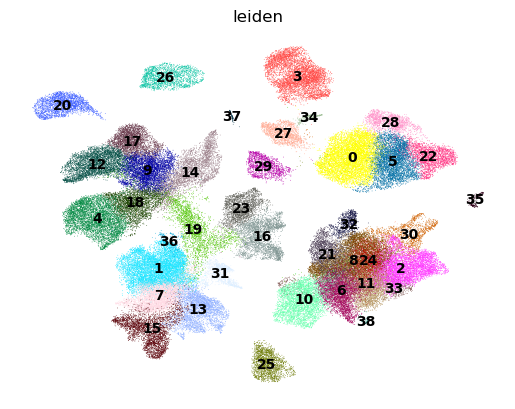

In [25]:
# plot umap

sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

In [197]:
markers[markers.names == 'CREBRF'].sort_values('logfoldchanges', ascending = False)


,group,names,scores,logfoldchanges,pvals,pvals_adj
710147,24,CREBRF,21.794186,2.336989,1.431360e-94,1.673559e-93
236902,8,CREBRF,21.429260,1.701999,4.810960e-97,4.731150e-96
59589,2,CREBRF,19.804623,1.381572,1.543595e-84,1.670120e-83
1036034,35,CREBRF,2.987028,1.227081,3.149931e-03,4.006109e-03
326346,11,CREBRF,14.146198,1.123856,1.992152e-44,1.280527e-43
503941,17,CREBRF,10.729173,0.984098,2.237925e-26,1.114104e-25
208747,7,CREBRF,7.807106,0.594635,7.191231e-15,3.190219e-14
622536,21,CREBRF,5.086660,0.569670,3.934681e-07,8.078837e-07


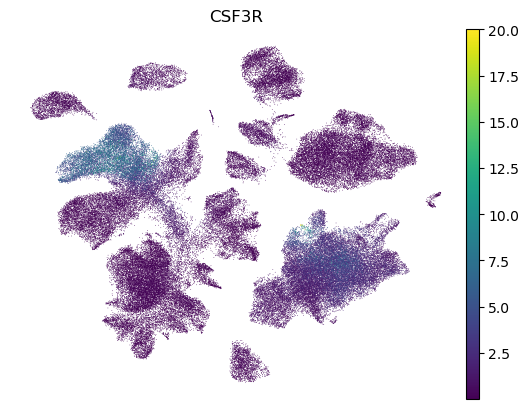

In [161]:
sc.pl.umap(adata, color = ['CSF3R'], frameon = False, layer = 'scvi_normalized', vmax  = 20)

In [195]:
markers[markers.group == '15'].sort_values('logfoldchanges', ascending = False).head(15)

,group,names,scores,logfoldchanges,pvals,pvals_adj
444663,15,GRID2,9.314965,8.433142,2.206804e-20,9.648164e-20
443716,15,ROBO2,140.536102,7.486378,0.000000e+00,0.000000e+00
445418,15,AC130415.1,5.210001,6.387796,2.008287e-07,5.113810e-07
444982,15,AL033539.2,7.118092,6.349184,1.345674e-12,4.511150e-12
443806,15,GRIA1,36.676044,6.245519,4.386567e-246,1.012951e-244
443740,15,AL031599.1,55.297695,6.235260,0.000000e+00,0.000000e+00
445133,15,AC021698.1,6.310575,5.857689,3.163615e-10,9.493090e-10
446654,15,AC013644.1,2.723966,5.856473,6.485428e-03,1.080150e-02
443877,15,AC012349.1,29.720882,5.806390,1.346194e-171,2.293881e-170
444435,15,LINC01837,11.542974,5.782687,3.160870e-30,1.736013e-29


In [198]:
# manually described all 38 clusters

cell_type = {"0":"CD4+ T-cells",
"1":"Fibroblasts",
"2":"Macrophages",
"3":"B cells",
"4":"AT1",
"5":"CD8+ T-cells",
"6":"Macrophages",
"7":"Fibroblasts",
"8":"Macrophages",
"9":"AT2",
"10":"Macrophages",
"11":"Macrophages",
"12":"AT2",
"13":"Fibroblasts",
"14":"Basal cells",
"15":"Neurons",
"16":"Endothelial cells",
"17":"AT2",
"18":"AT1",
"19":"Basal cells",
"20":"Ependymal cells",
"21":"Macrophages",
"22":"NK cells",
"23":"Endothelial cells",
"24":"Macrophages",
"25":"Endothelial cells",
"26":"Airway Epithelial",
"27":"B cells",
"28":"T cells",
"29":"Mast cells",
"30":"Dendritic cells",
"31":"Pericytes",
"32":"Monocytes",
"33":"Macrophages",
"34":"B cells",
"35":"Erythroid-like and erythroid precursor cells",
"36":"Smooth muscle",
"37":"Neurons",
"38":"Macrophages"
}

In [202]:
# map the cell names to the leiden group of adata

adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs['cell_type']

CATTCCGGTCGCACAC-1_16    Ependymal cells
TGAATGCGTGTGAGCA-1_16        Fibroblasts
GAAGGGTAGGATACGC-1_16    Ependymal cells
TACCGAATCTGTCAGA-1_16                AT1
TGCGATACAAGTGGAC-1_16                AT2
                              ...       
CCTAAGAAGTTGTCAC-1_27        Basal cells
CGTGAATCATGTCTAG-1_27        Macrophages
GCCGATGAGTAAACGT-1_27                AT2
AGGGTGAGTATCAGGG-1_27        Basal cells
ATGGATCAGAGAGCAA-1_27        Macrophages
Name: cell_type, Length: 108822, dtype: object

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


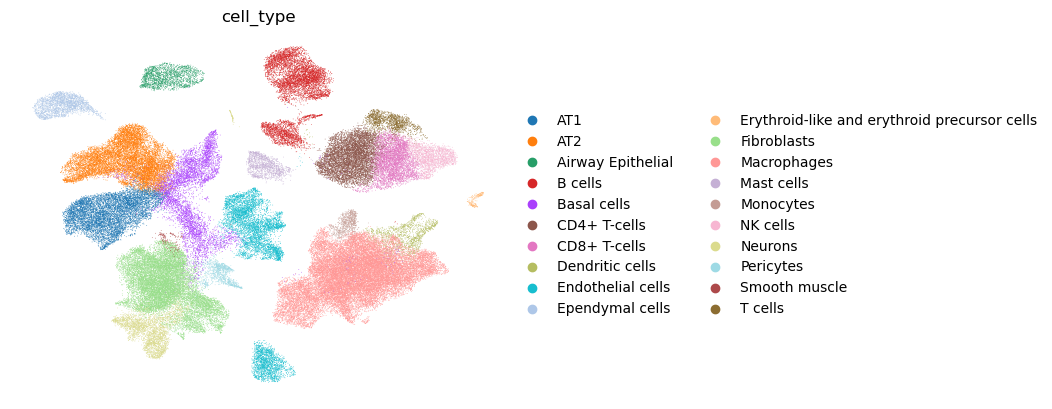

In [203]:
# plot the cell types

sc.pl.umap(adata, color = ['cell_type'], frameon = False)

In [204]:
# save all markers in unstructured slot of anndata

adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers

In [206]:
# save data

adata.write_h5ad('../data/processed/integrated.h5ad')

In [208]:
model.save('../data/processed/integrated.model')

## 6.0 Analysis

### 6.1 Cell counts and frequency

In [209]:
# created a new column to alble control and experimental samples

adata.obs.Sample.unique().tolist()

['L09cov',
 'L04covaddon',
 'L17cov',
 'C53ctr',
 'L03cov',
 'C54ctr',
 'L10cov',
 'L01cov',
 'L04cov',
 'L05cov',
 'C56ctr',
 'C57ctr',
 'L06cov',
 'L13cov',
 'C51ctr',
 'L16cov',
 'L07cov',
 'L18cov',
 'L21cov',
 'L12cov',
 'L11cov',
 'L08cov',
 'C52ctr',
 'L15cov',
 'L19cov',
 'C55ctr',
 'L22cov']

In [40]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [41]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
CATTCCGGTCGCACAC-1_16,L09cov,False,2244,2244,4135.0,0.0,0.0,22.0,0.532044,0,0,20,2.418380,Ependymal cells,COVID19
TGAATGCGTGTGAGCA-1_16,L09cov,False,2281,2281,4143.0,0.0,0.0,24.0,0.579290,0,0,1,2.413710,Fibroblasts,COVID19
GAAGGGTAGGATACGC-1_16,L09cov,False,2307,2307,4100.0,0.0,0.0,18.0,0.439024,0,0,20,2.439024,Ependymal cells,COVID19
TACCGAATCTGTCAGA-1_16,L09cov,False,2265,2265,3945.0,0.0,0.0,21.0,0.532319,0,0,18,2.534854,AT1,COVID19
TGCGATACAAGTGGAC-1_16,L09cov,False,2214,2214,3811.0,0.0,0.0,56.0,1.469431,0,0,9,2.623983,AT2,COVID19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,19,24.213076,Basal cells,COVID19
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,8,24.875622,Macrophages,COVID19
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,17,24.937656,AT2,COVID19
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,14,24.875622,Basal cells,COVID19


In [213]:
# counted total number of cells in each sample and saved it in a dict

num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

{'C51ctr': 5960,
 'C52ctr': 4415,
 'C53ctr': 6928,
 'C54ctr': 4284,
 'C55ctr': 5565,
 'C56ctr': 3904,
 'C57ctr': 4687,
 'L01cov': 2952,
 'L03cov': 3953,
 'L04cov': 3401,
 'L04covaddon': 4386,
 'L05cov': 2696,
 'L06cov': 6306,
 'L07cov': 4753,
 'L08cov': 3767,
 'L09cov': 3368,
 'L10cov': 1501,
 'L11cov': 2888,
 'L12cov': 3648,
 'L13cov': 4732,
 'L15cov': 3905,
 'L16cov': 1773,
 'L17cov': 4341,
 'L18cov': 2633,
 'L19cov': 2429,
 'L21cov': 3257,
 'L22cov': 6390}

In [215]:
# created df with counts of each cell type per condition per sample

cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,Sample,condition,cell_type,doublet
0,C51ctr,control,AT1,833
1,C51ctr,control,AT2,765
2,C51ctr,control,B cells,95
3,C51ctr,control,Basal cells,204
4,C51ctr,control,CD4+ T-cells,799
...,...,...,...,...
474,L22cov,COVID19,NK cells,123
475,L22cov,COVID19,Neurons,4
476,L22cov,COVID19,Pericytes,70
477,L22cov,COVID19,Smooth muscle,117


In [216]:
# added total counts and frequency using 'doublets' (doublets are in fact counts = wrong name)

cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells
cell_type_counts

,Sample,condition,cell_type,doublet,total_cells,frequency
0,C51ctr,control,AT1,833,5960,0.139765
1,C51ctr,control,AT2,765,5960,0.128356
2,C51ctr,control,B cells,95,5960,0.015940
3,C51ctr,control,Basal cells,204,5960,0.034228
4,C51ctr,control,CD4+ T-cells,799,5960,0.134060
...,...,...,...,...,...,...
474,L22cov,COVID19,NK cells,123,6390,0.019249
475,L22cov,COVID19,Neurons,4,6390,0.000626
476,L22cov,COVID19,Pericytes,70,6390,0.010955
477,L22cov,COVID19,Smooth muscle,117,6390,0.018310


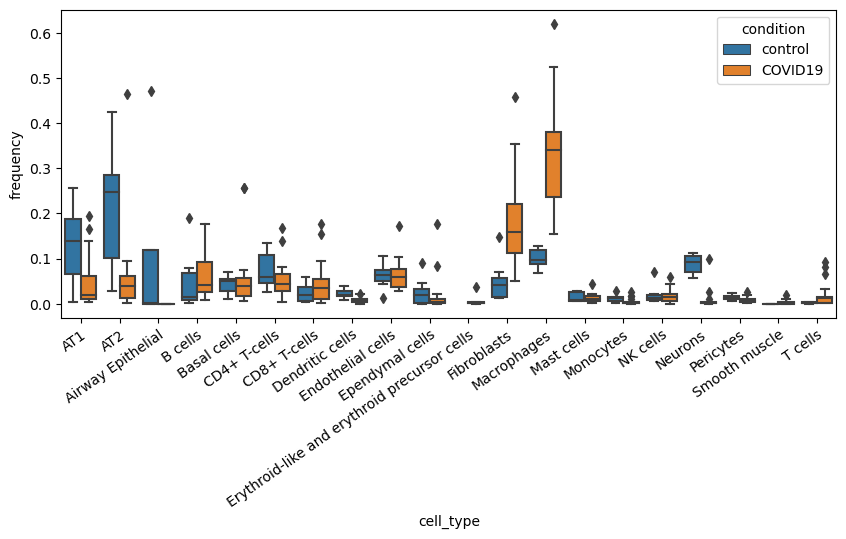

In [220]:
# plot frequency of each cell type per condition

plt.figure(figsize = (10,4))
ax = sns.boxplot(data = cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'condition')
plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.show()

## 6.2 Differential expression analysis

In [47]:
# created subset of AT1 and AT2 cells for DE analysis

subset = adata[adata.obs['cell_type'].isin(['AT1', 'AT2'])].copy()

#### 6.2.1 DE using diffxpy

Diffxpy can be used when SCVI model consist of only 2000 most variable genes -> only those would be in DE analysis, or when SCVI modeling was not utilised

#### 6.2.2 DE using SCVI

In [6]:
adata = sc.read_h5ad('../data/processed/integrated.h5ad')
model  = scvi.model.SCVI.load('../data/processed/integrated.model', adata)


INFO     File ../data/processed/integrated.model/model.pt already downloaded                 


In [24]:
# specified DE for AT1 and AT2 cells

scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell_type'] == 'AT1'],
    idx2 = [adata.obs['cell_type'] == 'AT2']
)

DE...: 100%|██████████| 1/1 [00:28<00:00, 28.63s/it]


In [25]:
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
CSF3R,0.9984,0.0016,6.436144,0.000019,0.000475,0.0,0.25,-5.504894,-5.790677,1.827076,-9.657651,1.667683,0.015401,0.674704,0.013573,0.416179,0.070746,4.321134,True
AC245041.2,0.9980,0.0020,6.212601,0.000191,0.000007,0.0,0.25,5.580454,5.769641,1.962991,-1.790491,11.625648,0.301749,0.006223,0.220830,0.005673,1.830016,0.034284,True
AFF3,0.9980,0.0020,6.212601,0.000068,0.001473,0.0,0.25,-4.943060,-5.062920,1.705798,-9.422698,1.273138,0.075176,2.526355,0.040720,0.713122,0.379500,16.639799,True
PTGFR,0.9980,0.0020,6.212601,0.000003,0.000207,0.0,0.25,-7.861268,-8.115481,2.651441,-14.160218,2.284846,0.002480,0.346092,0.001827,0.225201,0.009373,2.122904,True
AC096531.2,0.9978,0.0022,6.117091,0.000012,0.000610,0.0,0.25,-6.413683,-6.618393,2.130082,-11.648474,2.641776,0.007700,1.172443,0.005743,0.462939,0.036668,7.519609,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNOT4,0.3788,0.6212,-0.494645,0.000150,0.000159,0.0,0.25,-0.087002,-0.088083,0.276025,-1.862962,1.102571,0.263771,0.258420,0.213652,0.207998,1.621080,1.542061,False
MARCH7,0.3678,0.6322,-0.541666,0.000153,0.000153,0.0,0.25,-0.015146,-0.037503,0.292951,-1.749632,1.304901,0.281650,0.289170,0.227356,0.231424,1.699407,1.734644,False
ERC1,0.3396,0.6604,-0.665077,0.000443,0.000420,0.0,0.25,0.078513,0.078553,0.268409,-1.667850,1.181607,0.717966,0.654482,0.440486,0.425146,4.344604,3.994552,False
ARID2,0.3310,0.6690,-0.703666,0.000240,0.000238,0.0,0.25,0.015496,0.023442,0.256547,-1.561672,0.904511,0.355649,0.347100,0.268076,0.266929,2.163742,2.090877,False


In [26]:
# filter cells with FDR 0.05 and LFC > 0.5

scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de['lfc_mean']) > 0.5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
PTGFR,0.9980,0.0020,6.212601,2.892819e-06,2.069738e-04,0.0,0.25,-7.861268,-8.115481,2.651441,-14.160218,2.284846,0.002480,0.346092,0.001827,0.225201,0.009373,2.122904,True
CHI3L1,0.9916,0.0084,4.771087,1.329786e-06,3.762783e-05,0.0,0.25,-7.136305,-7.471992,3.427017,-16.739923,6.052692,0.000522,0.059663,0.000522,0.042460,0.003183,0.329219,True
SPRY4-AS1,0.9942,0.0058,5.144079,7.463221e-06,2.696549e-04,0.0,0.25,-6.669975,-6.944895,2.656960,-13.347029,3.197230,0.008222,0.449502,0.006787,0.258144,0.039226,2.781278,True
AC096531.2,0.9978,0.0022,6.117091,1.235048e-05,6.098750e-04,0.0,0.25,-6.413683,-6.618393,2.130082,-11.648474,2.641776,0.007700,1.172443,0.005743,0.462939,0.036668,7.519609,True
FGG,0.9952,0.0048,5.334326,9.931028e-07,6.674509e-05,0.0,0.25,-6.299501,-6.423651,2.453415,-12.476135,4.093285,0.000261,0.081259,0.000261,0.042094,0.001021,0.461441,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AP002856.2,0.9886,0.0114,4.462676,1.401360e-04,3.584047e-06,0.0,0.25,5.920576,6.034586,3.109537,-5.216263,14.821256,0.211434,0.002196,0.128818,0.001464,1.405827,0.009940,True
MS4A15,0.9908,0.0092,4.679308,1.776980e-04,6.531598e-06,0.0,0.25,5.947654,5.986515,2.912526,-5.279115,15.656141,0.276169,0.010432,0.177760,0.006589,1.874541,0.053418,True
SPARC,0.9900,0.0100,4.595119,4.453482e-05,2.161682e-06,0.0,0.25,6.078897,6.528831,2.531177,-3.269701,13.763907,0.032759,0.000183,0.028322,0.000183,0.178546,0.000522,True
LINC00842,0.9968,0.0032,5.741396,4.635335e-05,1.049594e-06,0.0,0.25,6.494114,6.769923,2.297823,-3.106787,12.628071,0.075829,0.001190,0.069042,0.001190,0.464311,0.007254,True


In [27]:
# filtered out genes that have raw_normalized_mean for the two groups les than 0.5
# done for plotting

scvi_de = scvi_de[(scvi_de['raw_normalized_mean1'] > 0.5) |( scvi_de['raw_normalized_mean2'] > 0.5)]
scvi_de

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
PTGFR,0.9980,0.0020,6.212601,0.000003,0.000207,0.0,0.25,-7.861268,-8.115481,2.651441,-14.160218,2.284846,0.002480,0.346092,0.001827,0.225201,0.009373,2.122904,True
SPRY4-AS1,0.9942,0.0058,5.144079,0.000007,0.000270,0.0,0.25,-6.669975,-6.944895,2.656960,-13.347029,3.197230,0.008222,0.449502,0.006787,0.258144,0.039226,2.781278,True
AC096531.2,0.9978,0.0022,6.117091,0.000012,0.000610,0.0,0.25,-6.413683,-6.618393,2.130082,-11.648474,2.641776,0.007700,1.172443,0.005743,0.462939,0.036668,7.519609,True
HHIP,0.9920,0.0080,4.820280,0.000006,0.000288,0.0,0.25,-6.289169,-6.442108,2.849750,-14.671521,7.778388,0.002741,0.395874,0.002219,0.188873,0.018074,2.571995,True
TMEM163,0.9962,0.0038,5.568944,0.000053,0.001205,0.0,0.25,-5.836139,-5.984640,2.285639,-11.593243,1.678267,0.088097,2.222811,0.049856,0.705619,0.445635,13.884951,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CACNG4,0.9954,0.0046,5.377086,0.000087,0.000003,0.0,0.25,5.686666,5.955702,1.965514,-2.539340,11.289467,0.127642,0.001098,0.104803,0.001098,0.872629,0.006283,True
AL355499.1,0.9942,0.0058,5.144079,0.000794,0.000021,0.0,0.25,5.707960,5.838075,2.297604,-7.556939,13.157652,1.323423,0.002013,0.533151,0.001739,8.458418,0.005582,True
SEMA3E,0.9926,0.0074,4.898846,0.000104,0.000001,0.0,0.25,5.732937,5.930072,2.408207,-3.134865,12.531954,0.167189,0.000000,0.103498,0.000000,0.996347,0.000000,True
AP002856.2,0.9886,0.0114,4.462676,0.000140,0.000004,0.0,0.25,5.920576,6.034586,3.109537,-5.216263,14.821256,0.211434,0.002196,0.128818,0.001464,1.405827,0.009940,True


In [28]:
# took top and bottom 25 genes from the sorted df

genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist()

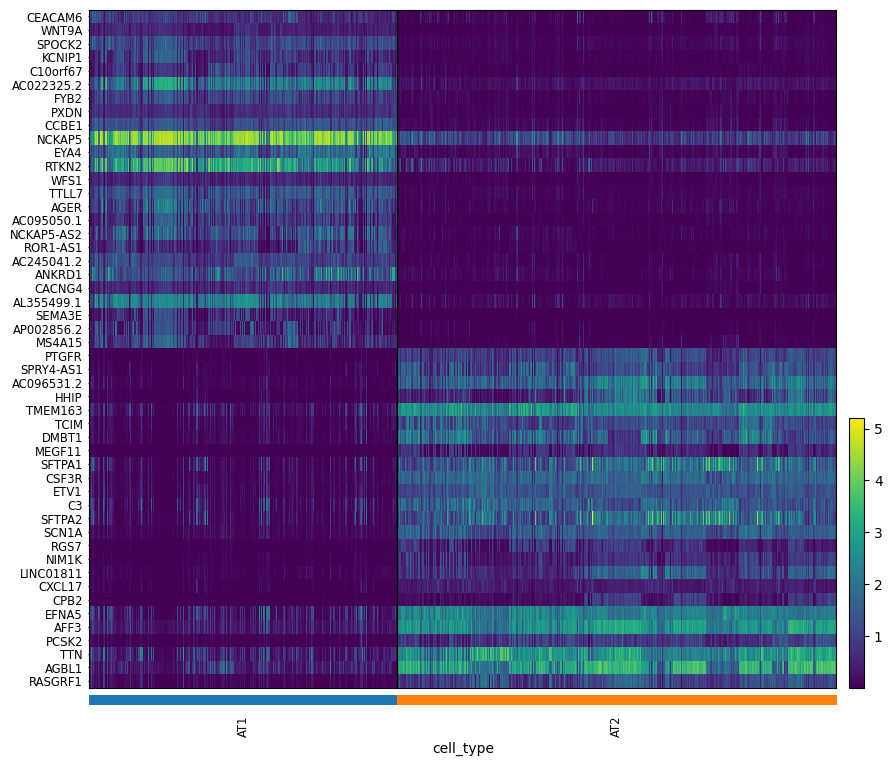

In [29]:
# plotted heatmap of top 25 up and 25 down regualted genes

sc.pl.heatmap(subset, genes_to_show, groupby = 'cell_type', swap_axes = True, layer = 'scvi_normalized', log = True)

## 7.0 GO enrichment

In [30]:
import gseapy as gp

# GO_Biological_Process_2023
# KEGG_2021_Human

In [31]:
# for gene list used var names from susbet
subset

AnnData object with n_obs × n_vars = 18590 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

['PTGFR',
 'SPRY4-AS1',
 'AC096531.2',
 'HHIP',
 'TMEM163',
 'TCIM',
 'DMBT1',
 'MEGF11',
 'SFTPA1',
 'CSF3R',
 'ETV1',
 'C3',
 'SFTPA2',
 'SCN1A',
 'RGS7',
 'NIM1K',
 'LINC01811',
 'CXCL17',
 'CPB2',
 'EFNA5',
 'AFF3',
 'PCSK2',
 'TTN',
 'AGBL1',
 'RASGRF1',
 'LRRK2',
 'LAMP3',
 'NRGN',
 'BMP1',
 'SLC46A2',
 'CHRM3',
 'PLIN5',
 'CTSH',
 'LRP2',
 'SFTPC',
 'AC002460.2',
 'SLC5A8',
 'MFSD2A',
 'AL360267.2',
 'AP001825.1',
 'ABCA3',
 'AC110760.1',
 'ARFGEF3',
 'PIGR',
 'SLC26A9',
 'LINC01807',
 'EPS8',
 'LINC02471',
 'ROS1',
 'LHFPL3-AS2',
 'PGC',
 'SLC6A14',
 'DLGAP1',
 'PLA2G4F',
 'ADGRF1',
 'ALOX15B',
 'LHFPL3',
 'HKDC1',
 'IRX3',
 'ARHGEF38',
 'CA12',
 'ACOXL',
 'FNIP2',
 'AC046195.1',
 'SGPP2',
 'AC105290.1',
 'CPB2-AS1',
 'AC003991.1',
 'ALPL',
 'CNTN1',
 'SLC22A31',
 'PPP4R4',
 'KIAA1324L',
 'FASN',
 'PTPRN2',
 'C3orf79',
 'SPINK5',
 'TCF7L1',
 'AC105206.1',
 'NCMAP',
 'MUCL3',
 'AC046195.2',
 'CFTR',
 'STEAP4',
 'FOXP2',
 'CCDC141',
 'AUTS2',
 'AC011346.1',
 'DLG2',
 'LRRC36',
 '

In [37]:
enr = gp.enrichr(gene_list=scvi_de[(scvi_de['raw_normalized_mean1'] > 0) |( scvi_de['raw_normalized_mean2'] > 0)].index.tolist(),
                gene_sets=['GO_Biological_Process_2023', 'KEGG_2021_Human'],
                organism = 'human',
                outdir = None,
                background = subset.var_names.tolist()
                )

In [38]:
enr.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of Cell Migration (GO:0030...,2.817337e-12,9.091546e-09,0,0,4.615197,122.742222,SEMA5A;CD151;BMPR2;SEMA3B;TWIST2;PDGFA;LAMC2;S...
1,GO_Biological_Process_2023,Negative Regulation Of Cellular Process (GO:00...,1.451865e-11,2.161550e-08,0,0,3.296555,82.267471,SEMA5A;COL18A1;RIPOR2;TES;BMPR2;FHL1;JADE1;SPI...
2,GO_Biological_Process_2023,Positive Regulation Of Cell Motility (GO:2000147),2.401589e-11,2.161550e-08,0,0,4.910403,120.070682,SEMA5A;CD151;SEMA3B;TWIST2;PDGFA;LAMC2;SEMA3E;...
3,GO_Biological_Process_2023,Regulation Of Cell Migration (GO:0030334),2.679330e-11,2.161550e-08,0,0,3.555226,86.544404,SEMA5A;CD151;MCTP1;SEMA3B;TNC;TWIST2;PDGFA;NEX...
4,GO_Biological_Process_2023,Regulation Of Cell Population Proliferation (G...,1.301687e-10,8.401088e-08,0,0,2.770214,63.056143,COL18A1;TES;BMPR2;RTKN2;LAMC2;FGF1;AREG;ACTB;N...
...,...,...,...,...,...,...,...,...,...
3507,KEGG_2021_Human,Alcoholism,9.606436e-01,9.743183e-01,0,0,0.306965,0.012325,BDNF
3508,KEGG_2021_Human,RNA transport,9.711066e-01,9.814375e-01,0,0,0.367145,0.010764,CYFIP2;NMD3
3509,KEGG_2021_Human,Oxidative phosphorylation,9.775702e-01,9.838025e-01,0,0,0.261034,0.005922,ATP6V0E1
3510,KEGG_2021_Human,Oocyte meiosis,9.803505e-01,9.838025e-01,0,0,0.252150,0.005004,ADCY7


## 8.0 Comparison

/home/tomasd/miniconda3/envs/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


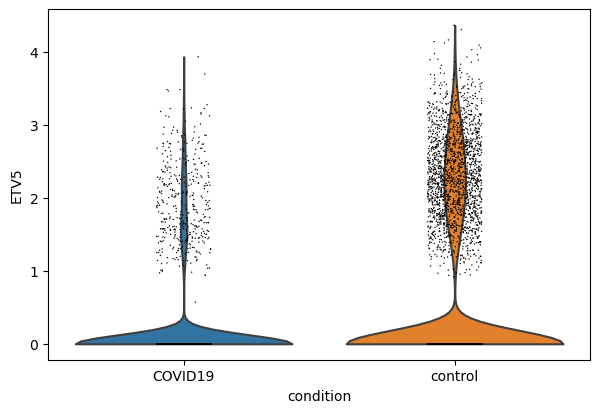

In [48]:
# compare ETV5 gene expression between two conditions in AT2 cells

sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby = 'condition');

### 8.1 Determine statistical significance of the violin plots


In [49]:
from scipy import stats

In [50]:
temp = subset[subset.obs.cell_type == 'AT2'] # subset genes from AT2 cells
i = np.where(temp.var_names == 'ETV5')[0][0] # subset ETV5 gene from temp subset

In [61]:
# get the raw data slice for AT2 cells ETV5 gene in the two conditions as two arrays

a = temp[temp.obs.condition == 'COVID19'].X[:,i].toarray()
b = temp[temp.obs.condition == 'control'].X[:,i].toarray()

In [63]:
# since data is not normally distributed I am not performing t-test but non-parametric test

stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=array([11178612.5]), pvalue=array([6.3953449e-88]))

 MannwhitneyuResult(statistic=array([11178612.5]), pvalue=array([6.3953449e-88])) -> significant

### 8.2 Score gene signatures

In [64]:
# read gene signature from the authors
# 166 genes

with open('../data/gene_signatures.txt') as f:
    data_sig = [x.strip() for x in list(f)]

In [66]:
# calculate relative expression of the genes in the list compared to the background and save as a new column

sc.tl.score_genes(subset, data_sig, score_name = 'datp')
subset.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition,datp
TACCGAATCTGTCAGA-1_16,L09cov,False,2265,2265,3945.0,0.0,0.0,21.0,0.532319,0,0,18,2.534854,AT1,COVID19,0.642806
TGCGATACAAGTGGAC-1_16,L09cov,False,2214,2214,3811.0,0.0,0.0,56.0,1.469431,0,0,9,2.623983,AT2,COVID19,0.769334
CGTAGTACATTAAGCC-1_16,L09cov,False,2241,2241,3779.0,0.0,0.0,31.0,0.820323,0,0,18,2.646203,AT1,COVID19,0.692300
TCTATCACATCGCTGG-1_16,L09cov,False,2299,2299,3676.0,0.0,0.0,31.0,0.843308,0,0,9,2.720348,AT2,COVID19,0.497359
GAGACTTAGGGCAGTT-1_16,L09cov,False,1761,1761,3004.0,0.0,0.0,12.0,0.399467,0,0,18,3.328895,AT1,COVID19,0.695472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAATCCGTTGTAAAG-1_27,L22cov,False,371,371,425.0,0.0,0.0,7.0,1.647059,0,0,9,23.529411,AT2,COVID19,0.463093
GGTAACTTCGGTCACG-1_27,L22cov,False,349,349,415.0,0.0,0.0,4.0,0.963855,0,0,9,24.096386,AT2,COVID19,0.249749
AGATAGATCGTCGACG-1_27,L22cov,False,326,326,401.0,0.0,0.0,0.0,0.000000,0,0,9,24.937656,AT2,COVID19,0.263772
TTGTGGATCATAGGCT-1_27,L22cov,False,329,329,406.0,0.0,0.0,1.0,0.246305,0,0,9,24.630541,AT2,COVID19,0.087415


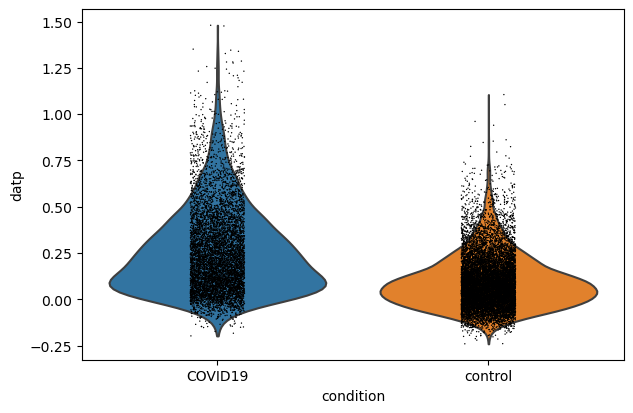

In [67]:
# compare the relative expression of the genes between conditions

sc.pl.violin(subset, 'datp', groupby = 'condition')

In [68]:
# statistical test

a = subset[subset.obs.condition == 'COVID19'].obs.datp.values
b = subset[subset.obs.condition == 'control'].obs.datp.values
stats.mannwhitneyu(a ,b)

MannwhitneyuResult(statistic=58773124.0, pvalue=0.0)

not significant